In [1]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt

In [2]:
path = r"C:\Users\PC\Desktop\archive\spam.csv"
df = pd.read_csv(path, encoding='latin-1')
print(df.head())

     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [3]:
print(df.columns.tolist())

['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']


In [4]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)
print(df.head())

     v1                                                 v2
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [5]:
df.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)
print(df.head())

  target                                               text
0    ham  Go until jurong point, crazy.. Available only ...
1    ham                      Ok lar... Joking wif u oni...
2   spam  Free entry in 2 a wkly comp to win FA Cup fina...
3    ham  U dun say so early hor... U c already then say...
4    ham  Nah I don't think he goes to usf, he lives aro...


In [6]:
print(df.columns.tolist())

['target', 'text']


In [7]:
df.columns = df.columns.str.strip()

In [8]:
df.drop_duplicates(keep='first', inplace=True)
df.reset_index(drop=True, inplace=True)
print(df.head())

  target                                               text
0    ham  Go until jurong point, crazy.. Available only ...
1    ham                      Ok lar... Joking wif u oni...
2   spam  Free entry in 2 a wkly comp to win FA Cup fina...
3    ham  U dun say so early hor... U c already then say...
4    ham  Nah I don't think he goes to usf, he lives aro...


In [9]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
df['target'] = df['target'].map({'ham': 0, 'spam': 1})
print(df['target'].unique())
print(df['target'].value_counts())

[0 1]
target
0    4516
1     653
Name: count, dtype: int64


In [11]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [12]:
df['num_characters'] = df['text'].apply(len)
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [13]:
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [14]:
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [15]:
print(df[['num_characters', 'num_words', 'num_sentences']].describe())

       num_characters    num_words  num_sentences
count     5169.000000  5169.000000    5169.000000
mean        78.977945    18.455794       1.965564
std         58.236293    13.324758       1.448541
min          2.000000     1.000000       1.000000
25%         36.000000     9.000000       1.000000
50%         60.000000    15.000000       1.000000
75%        117.000000    26.000000       2.000000
max        910.000000   220.000000      38.000000


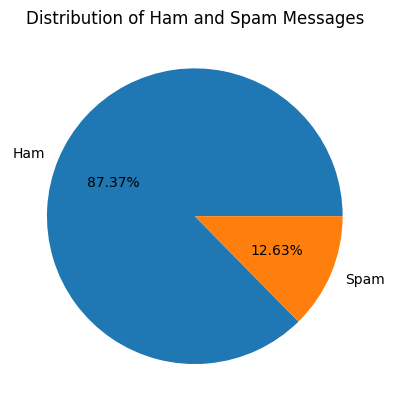

In [201]:
plt.pie(df['target'].value_counts(), labels=['Ham', 'Spam'], autopct="%0.2f%%")
plt.title("Distribution of Ham and Spam Messages")
plt.show()

In [17]:
print("🟢 Ham Message Stats:")
print(df[df['target'] == 0][['num_characters', 'num_words', 'num_sentences']].describe())

🟢 Ham Message Stats:
       num_characters    num_words  num_sentences
count     4516.000000  4516.000000    4516.000000
mean        70.459256    17.123782       1.820195
std         56.358207    13.493970       1.383657
min          2.000000     1.000000       1.000000
25%         34.000000     8.000000       1.000000
50%         52.000000    13.000000       1.000000
75%         90.000000    22.000000       2.000000
max        910.000000   220.000000      38.000000


In [18]:
print("🔴 Spam Message Stats:")
print(df[df['target'] == 1][['num_characters', 'num_words', 'num_sentences']].describe())

🔴 Spam Message Stats:
       num_characters   num_words  num_sentences
count      653.000000  653.000000     653.000000
mean       137.891271   27.667688       2.970904
std         30.137753    7.008418       1.488425
min         13.000000    2.000000       1.000000
25%        132.000000   25.000000       2.000000
50%        149.000000   29.000000       3.000000
75%        157.000000   32.000000       4.000000
max        224.000000   46.000000       9.000000


In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
numeric_df = df.select_dtypes(include='number')

<Axes: xlabel='num_characters', ylabel='Count'>

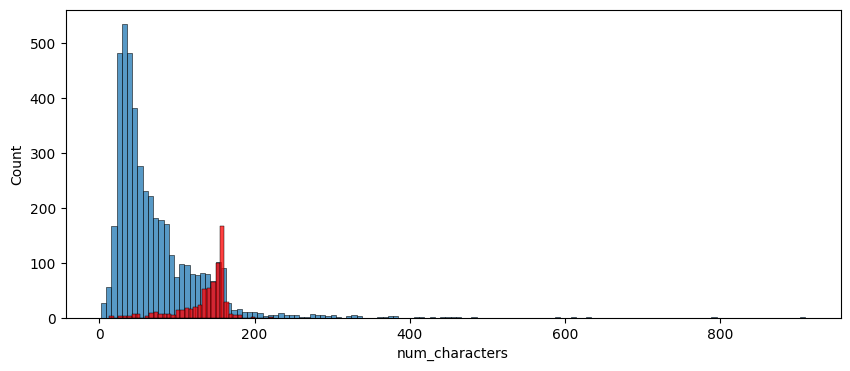

In [21]:
plt.figure(figsize=(10,4))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

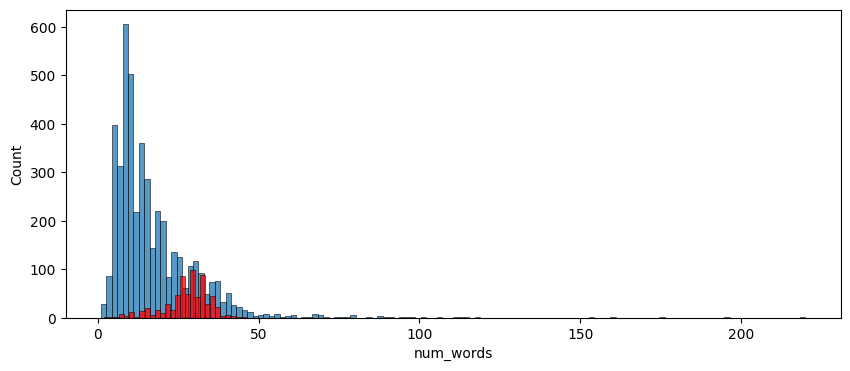

In [22]:
plt.figure(figsize=(10,4))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

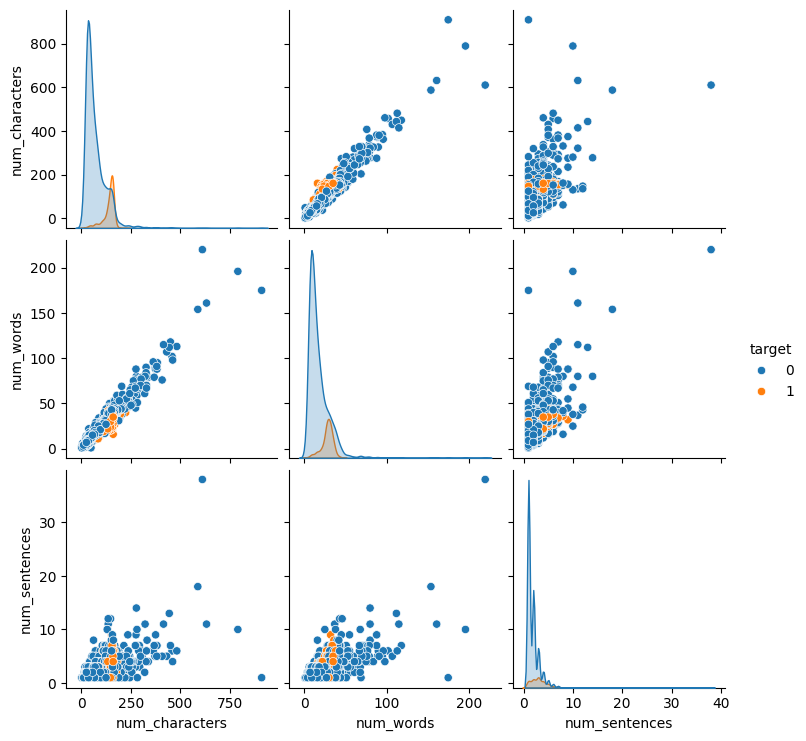

In [23]:
sns.pairplot(df,hue='target')

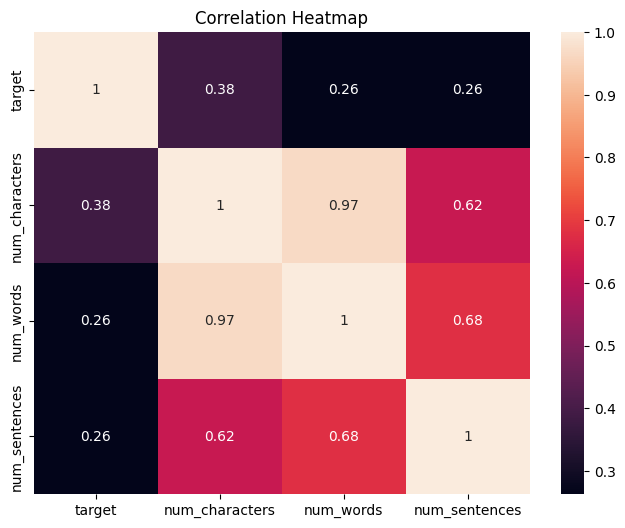

In [24]:
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True)
plt.title("Correlation Heatmap")
plt.show()

# **3. Data Preprocessing**

* Lower case
* Tokenization
* Removing special characters
* Removing stop words and punctuation
* Stemming

In [25]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [26]:
stop_words = set(stopwords.words('english'))

In [27]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()

    for i in text:
        if i not in stop_words:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

In [28]:
transform_text("I love Playing Cricket with Friends. what about you?")

'love play cricket friend'

In [29]:
df['text'][2000]

"Trust me. Even if isn't there, its there."

In [30]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving' )

'love'

In [31]:
df['transformed_text'] = df['text'].apply(transform_text)

In [32]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [33]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [34]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

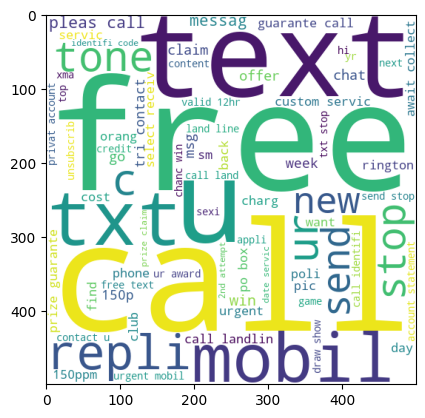

In [35]:
plt.imshow(spam_wc)

In [36]:
ham_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

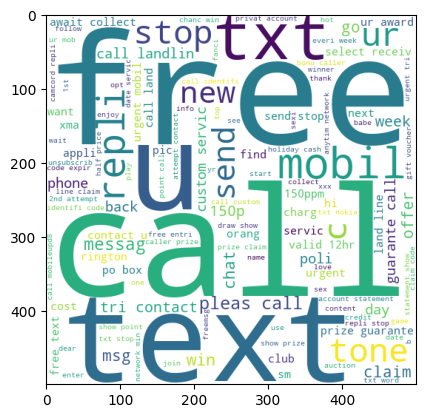

In [37]:
plt.imshow(spam_wc)

In [38]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [39]:
len(spam_corpus)

9939

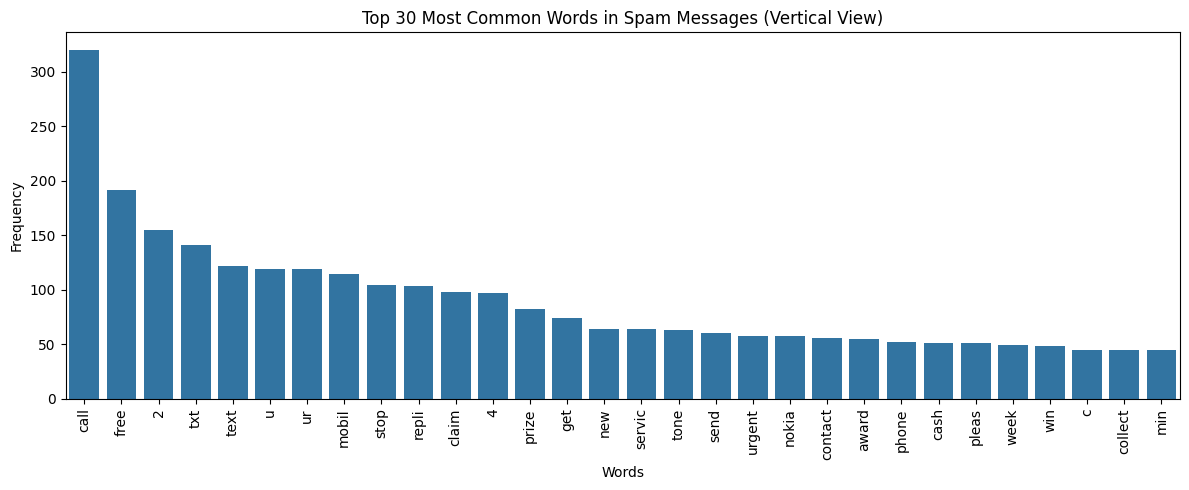

In [40]:
from collections import Counter
import matplotlib.pyplot as plt

most_common_df = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['word', 'count'])

plt.figure(figsize=(12, 5))
sns.barplot(x='word', y='count', data=most_common_df)
plt.xticks(rotation=90)
plt.title("Top 30 Most Common Words in Spam Messages (Vertical View)")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


In [41]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [42]:
len(ham_corpus)

35404

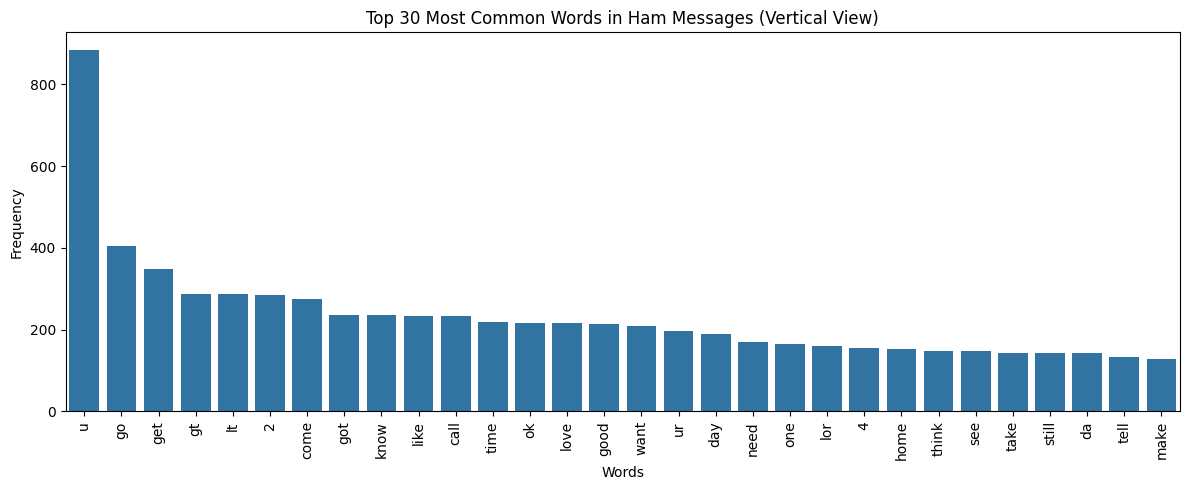

In [43]:
from collections import Counter
import matplotlib.pyplot as plt

ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

most_common_ham = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['word', 'count'])

plt.figure(figsize=(12, 5))
sns.barplot(x='word', y='count', data=most_common_ham)
plt.xticks(rotation=90)
plt.title("Top 30 Most Common Words in Ham Messages (Vertical View)")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


In [44]:
# text vectorization
# using bag of words
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


# 4. Model Building

In [156]:
print(df.columns.tolist())

['target', 'text', 'num_characters', 'num_words', 'num_sentences', 'transformed_text']


In [157]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['transformed_text'])

In [158]:
from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler()
X = scaler.fit_transform(X)

In [159]:
X.shape

(5169, 3000)

In [161]:
df['transformed_text'] = df['text'].apply(transform_text)

In [162]:
y = df['target'].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [163]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()

gnb.fit(X_train_dense, y_train)
y_pred1 = gnb.predict(X_test_dense)

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8617021276595744
[[779 124]
 [ 19 112]]
0.4745762711864407


In [164]:
mnb = MultinomialNB()
bnb = BernoulliNB()

In [165]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9806576402321083
[[896   7]
 [ 13 118]]
0.944


In [166]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9825918762088974
[[902   1]
 [ 17 114]]
0.991304347826087


In [167]:
#tfidf --> MNB

In [168]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [169]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2, algorithm='SAMME')
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [170]:
clfs = {
    'SVC' : svc,
    'NB' : mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT': gbdt,
    'xgb': xgb
}

In [171]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    return accuracy,precision

train_classifier(svc,X_train,y_train,X_test,y_test)


(0.9787234042553191, 0.9658119658119658)

In [172]:
accuracy_scores = []
precision_scores = []
algorithm_names = []

for name, clf in clfs.items():
    try:
        acc, prec = train_classifier(clf, X_train, y_train, X_test, y_test)
        print(f"✅ {name} | Accuracy: {acc:.4f} | Precision: {prec:.4f}")
        accuracy_scores.append(acc)
        precision_scores.append(prec)
        algorithm_names.append(name)
    except Exception as e:
        print(f"❌ {name} failed: {e}")

✅ SVC | Accuracy: 0.9787 | Precision: 0.9658
✅ NB | Accuracy: 0.9807 | Precision: 0.9440
✅ DT | Accuracy: 0.9391 | Precision: 0.8269
✅ LR | Accuracy: 0.9613 | Precision: 0.9596
✅ RF | Accuracy: 0.9720 | Precision: 0.9722
✅ AdaBoost | Accuracy: 0.9236 | Precision: 0.7766
✅ BgC | Accuracy: 0.9536 | Precision: 0.8374
✅ ETC | Accuracy: 0.9758 | Precision: 0.9732
✅ GBDT | Accuracy: 0.9584 | Precision: 0.9783
✅ xgb | Accuracy: 0.9652 | Precision: 0.9060


In [173]:
performance_df = pd.DataFrame({
    'Algorithm': algorithm_names,
    'Accuracy': accuracy_scores,
    'Precision': precision_scores
}).sort_values('Precision', ascending=False)

In [174]:
performance_df

,Algorithm,Accuracy,Precision
8,GBDT,0.958414,0.978261
7,ETC,0.975822,0.973214
4,RF,0.971954,0.972222
0,SVC,0.978723,0.965812
3,LR,0.961315,0.959596
1,NB,0.980658,0.944000
9,xgb,0.965184,0.905983
6,BgC,0.953578,0.837398
2,DT,0.939072,0.826923
5,AdaBoost,0.923598,0.776596


In [175]:
performance_df1 = pd.melt(performance_df, id_vars="Algorithm")

In [176]:
performance_df1

,Algorithm,variable,value
0,GBDT,Accuracy,0.958414
1,ETC,Accuracy,0.975822
2,RF,Accuracy,0.971954
3,SVC,Accuracy,0.978723
4,LR,Accuracy,0.961315
5,NB,Accuracy,0.980658
6,xgb,Accuracy,0.965184
7,BgC,Accuracy,0.953578
8,DT,Accuracy,0.939072
9,AdaBoost,Accuracy,0.923598


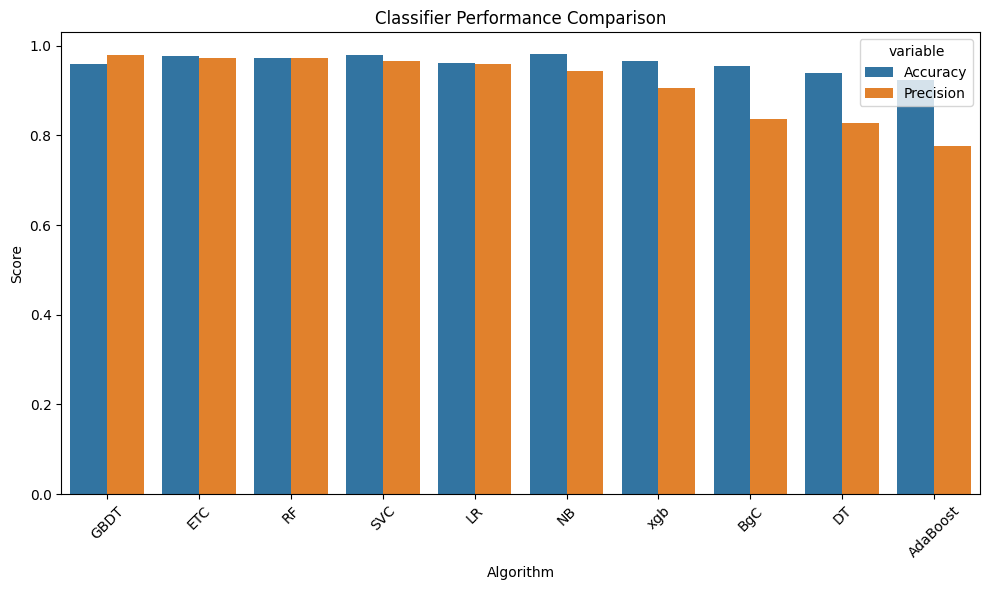

In [177]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(data=performance_df1, x='Algorithm', y='value', hue='variable')
plt.title("Classifier Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [178]:
# modelimprove
# 1. change max_feature parameter of TfIdf

In [179]:
temp_df = pd.DataFrame({
    'Algorithm': algorithm_names,
    'accuracy_max_ft_3000': accuracy_scores,
    'precision_max_': precision_scores
}).sort_values('precision_max_', ascending=False)

In [181]:
merged_df = performance_df.merge(temp_df, on='Algorithm', suffixes=('', '_dup'))
print("\n🧩 Merged Scaled + Max FT 3000:")
print(merged_df)


🧩 Merged Scaled + Max FT 3000:
  Algorithm  Accuracy  Precision  accuracy_max_ft_3000  precision_max_
0      GBDT  0.958414   0.978261              0.958414        0.978261
1       ETC  0.975822   0.973214              0.975822        0.973214
2        RF  0.971954   0.972222              0.971954        0.972222
3       SVC  0.978723   0.965812              0.978723        0.965812
4        LR  0.961315   0.959596              0.961315        0.959596
5        NB  0.980658   0.944000              0.980658        0.944000
6       xgb  0.965184   0.905983              0.965184        0.905983
7       BgC  0.953578   0.837398              0.953578        0.837398
8        DT  0.939072   0.826923              0.939072        0.826923
9  AdaBoost  0.923598   0.776596              0.923598        0.776596


In [155]:
performance_df.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,accuracy_max_ft_3000,precision_max_
0,GBDT,0.958414,0.978261,0.958414,0.978261
1,ETC,0.975822,0.973214,0.975822,0.973214
2,RF,0.971954,0.972222,0.971954,0.972222
3,SVC,0.978723,0.965812,0.978723,0.965812
4,LR,0.961315,0.959596,0.961315,0.959596
5,NB,0.980658,0.944000,0.980658,0.944000
6,xgb,0.965184,0.905983,0.965184,0.905983
7,BgC,0.953578,0.837398,0.953578,0.837398
8,DT,0.938104,0.819048,0.938104,0.819048
9,AdaBoost,0.923598,0.776596,0.923598,0.776596


In [182]:
print("Is everything scaled? ", isinstance(X, (np.ndarray)) or hasattr(X, "toarray"))

Is everything scaled?  True


In [183]:
# now try voting

In [188]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, VotingClassifier, StackingClassifier
from xgboost import XGBClassifier

In [189]:
lrc = LogisticRegression(solver='liblinear', penalty='l1', random_state=2)
svc = SVC(kernel='sigmoid', gamma=1.0, probability=True, random_state=2)
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5, random_state=2)
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, use_label_encoder=False, eval_metric='logloss', random_state=2)

In [190]:
voting_clf = VotingClassifier(
    estimators=[
        ('lr', lrc),
        ('svc', svc),
        ('mnb', mnb),
        ('rf', rfc),
        ('xgb', xgb)
    ],
    voting='hard'
)

In [191]:
voting_clf.fit(X_train, y_train)
y_pred_voting = voting_clf.predict(X_test)

C:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:52:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [192]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

acc_voting = accuracy_score(y_test, y_pred_voting)
prec_voting = precision_score(y_test, y_pred_voting)

In [193]:
print("📊 Voting Classifier")
print("✅ Accuracy:", acc_voting)
print("✅ Precision:", prec_voting)
print("🧾 Confusion Matrix:\n", confusion_matrix(y_test, y_pred_voting))

📊 Voting Classifier
✅ Accuracy: 0.9806576402321083
✅ Precision: 1.0
🧾 Confusion Matrix:
 [[903   0]
 [ 20 111]]


In [194]:
stacking_clf = StackingClassifier(
    estimators=[
        ('dt', dtc),
        ('svc', svc),
        ('mnb', mnb),
        ('rf', rfc),
        ('xgb', xgb)
    ],
    final_estimator=LogisticRegression(solver='liblinear', random_state=2)
)

In [195]:
stacking_clf.fit(X_train, y_train)
y_pred_stack = stacking_clf.predict(X_test)

C:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:52:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:53:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:53:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:53:22] WARNING: C:\actions-runner\_w

In [196]:
acc_stack = accuracy_score(y_test, y_pred_stack)
prec_stack = precision_score(y_test, y_pred_stack)

print("\n📊 Stacking Classifier")
print("✅ Accuracy:", acc_stack)
print("✅ Precision:", prec_stack)
print("🧾 Confusion Matrix:\n", confusion_matrix(y_test, y_pred_stack))


📊 Stacking Classifier
✅ Accuracy: 0.9864603481624759
✅ Precision: 0.9834710743801653
🧾 Confusion Matrix:
 [[901   2]
 [ 12 119]]


In [202]:
performance_df = pd.concat([
    performance_df,
    pd.DataFrame({
        'Algorithm': ['Voting', 'Stacking'],
        'Accuracy': [acc_voting, acc_stack],
        'Precision': [prec_voting, prec_stack]
    })
], ignore_index=True)

performance_df = performance_df.sort_values(by='Precision', ascending=False)
print(performance_df)


   Algorithm  Accuracy  Precision
0     Voting  0.980658   1.000000
12    Voting  0.980658   1.000000
1   Stacking  0.986460   0.983471
13  Stacking  0.986460   0.983471
2       GBDT  0.958414   0.978261
3        ETC  0.975822   0.973214
4         RF  0.971954   0.972222
5        SVC  0.978723   0.965812
6         LR  0.961315   0.959596
7         NB  0.980658   0.944000
8        xgb  0.965184   0.905983
9        BgC  0.953578   0.837398
10        DT  0.939072   0.826923
11  AdaBoost  0.923598   0.776596


In [204]:
import pickle
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['transformed_text'])  
y = df['target']                         

model = MultinomialNB()
model.fit(X, y)  # ✅ Required!

pickle.dump(tfidf, open("vectorizer.pkl", "wb"))
pickle.dump(model, open("model.pkl", "wb"))
